In [ ]:
# load ratings.csv file

import pandas as pd
ratings = pd.read_csv('ratings.csv')
print(ratings['userId'].nunique())

610


In [ ]:
# loading links.csv file

links = pd.read_csv('links.csv')
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
# loading tags.csv file

tags = pd.read_csv('tags.csv')
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [ ]:
# loading movies.csv and Which movie has recieved maximum number of user ratings

movies = pd.read_csv('movies.csv')
rating_count = ratings.groupby('movieId')['rating'].count()
max_ratings_movie_id = rating_count.idxmax()
movies[movies['movieId'] == max_ratings_movie_id]

,movieId,title,genres
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War


In [ ]:
# Select all the correct tags submitted by users to "Matrix, The (1999)" movie?

import pandas as pd

tags = pd.read_csv('tags.csv')
matrix_tags = tags[tags['movieId'] == movies[movies['title'] == 'Matrix, The (1999)']['movieId'].values[0]]
print(matrix_tags)

      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


In [ ]:
# What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

terminator_2_ratings = ratings[ratings['movieId'] == movies[movies['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].values[0]]
print(terminator_2_ratings['rating'].mean())

3.970982142857143


<Axes: >

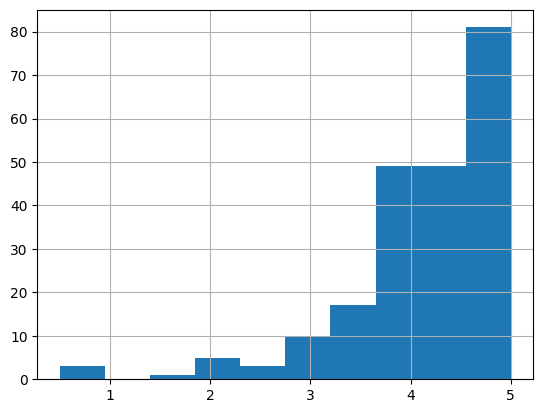

In [ ]:
# How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

fight_club_ratings = ratings[ratings['movieId'] == movies[movies['title'] == 'Fight Club (1999)']['movieId'].values[0]]
fight_club_ratings['rating'].hist()

In [26]:
# Group the user ratings based on movieId and apply aggregation operations
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
# Apply inner join on dataframe created from movies.csv and the grouped df
movie_stats = pd.merge(movies, grouped_ratings, on='movieId', how='inner')
# Filter movies with more than 50 ratings
popular_movies = movie_stats[movie_stats['count'] > 50]

In [27]:
sorted_movies = popular_movies.sort_values('mean', ascending=False)
# title of the most popular movie
most_popular_movie = sorted_movies.iloc[0]['title']
print(most_popular_movie)

Shawshank Redemption, The (1994)


In [28]:
# Group the ratings by movieId and count the number of ratings
movie_rating_counts = ratings.groupby('movieId')['rating'].count()
# top 5 most rated movies
top_5_rated_movies = movie_rating_counts.nlargest(5)
for movie_id in top_5_rated_movies.index:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(movie_title)

Forrest Gump (1994)
Shawshank Redemption, The (1994)
Pulp Fiction (1994)
Silence of the Lambs, The (1991)
Matrix, The (1999)


In [29]:
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
sci_fi_ratings = pd.merge(sci_fi_movies, ratings, on='movieId')
sci_fi_rating_counts = sci_fi_ratings.groupby('movieId')['rating'].count()
top_3_rated_sci_fi = sci_fi_rating_counts.nlargest(3)
third_most_popular_id = top_3_rated_sci_fi.index[2]
# title of the third most popular Sci-Fi movie
third_most_popular_title = movies[movies['movieId'] == third_most_popular_id]['title'].values[0]
print(third_most_popular_title)

Jurassic Park (1993)


In [24]:
shawshank_redemption_id = movies[movies['title'] == 'Shawshank Redemption, The (1994)']['movieId'].values[0]
print(shawshank_redemption_id)

318


In [30]:
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi')]
sci_fi_ratings = pd.merge(sci_fi_movies, ratings, on='movieId')
average_sci_fi_ratings = sci_fi_ratings.groupby('movieId')['rating'].mean()
# movieId with the highest average rating
highest_rated_sci_fi_id = average_sci_fi_ratings.idxmax()
print(highest_rated_sci_fi_id)

3687
